In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dt

In [25]:
df = pd.read_csv("./data/seattle.csv")
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [27]:
df.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [28]:
df['date'] = pd.to_datetime(df['date'],format="%Y-%m-%d")

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [30]:
df = df.set_index('date')

In [31]:
df.head(10)

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
2012-01-06,2.5,4.4,2.2,2.2,rain
2012-01-07,0.0,7.2,2.8,2.3,rain
2012-01-08,0.0,10.0,2.8,2.0,sun
2012-01-09,4.3,9.4,5.0,3.4,rain


In [49]:
import os
folder = "outputs"
os.makedirs(folder,exist_ok=True)

In [37]:
df['temp_max_ma'] = df['temp_max'].rolling(window=30).mean()


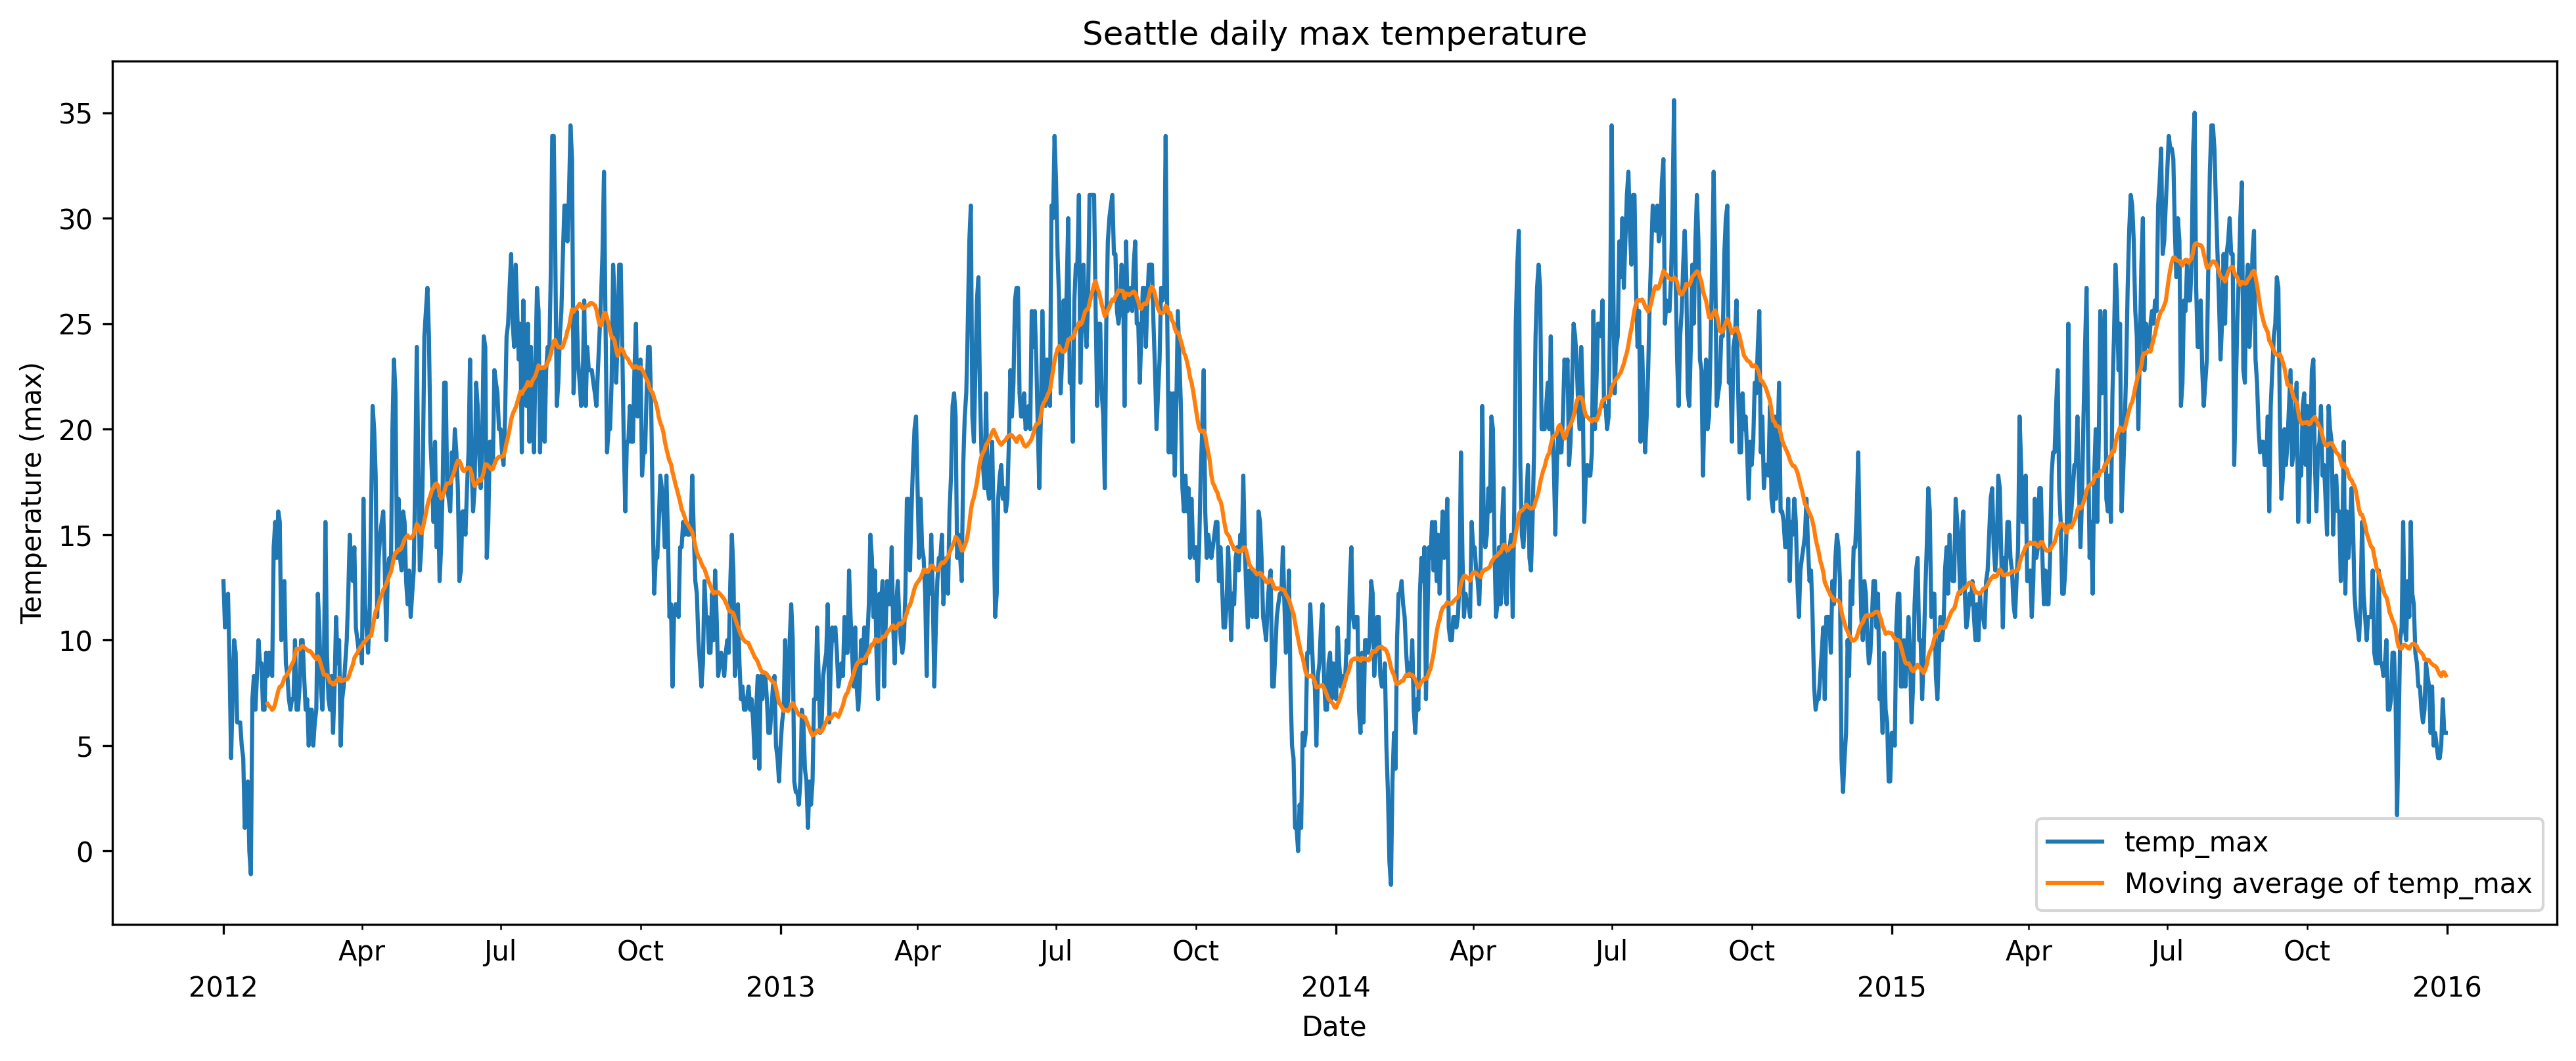

In [52]:

# Plotting
fig, ax = plt.subplots(figsize=(16, 6), dpi=300)
ax.plot(df['temp_max'], label = "temp_max")
ax.plot(df['temp_max_ma'], label = "Moving average of temp_max")

# Formatting axe to make it easier to read
ax.xaxis.set_major_locator(dt.YearLocator())
ax.xaxis.set_minor_locator(dt.MonthLocator((4,7,10)))

ax.xaxis.set_major_formatter(dt.DateFormatter("\n%Y"))
ax.xaxis.set_minor_formatter(dt.DateFormatter("%b"))
plt.setp(ax.get_xticklabels(), rotation=0, ha="center")
plt.subplots_adjust(bottom=0.15)

# Labelling 
plt.xlabel("Date")
plt.ylabel("Temperature (max)")
plt.title("Seattle daily max temperature")
plt.legend()
plt.show()

output_path = os.path.join(folder, "temperature.png")
fig.savefig(output_path)
plt.close(fig)

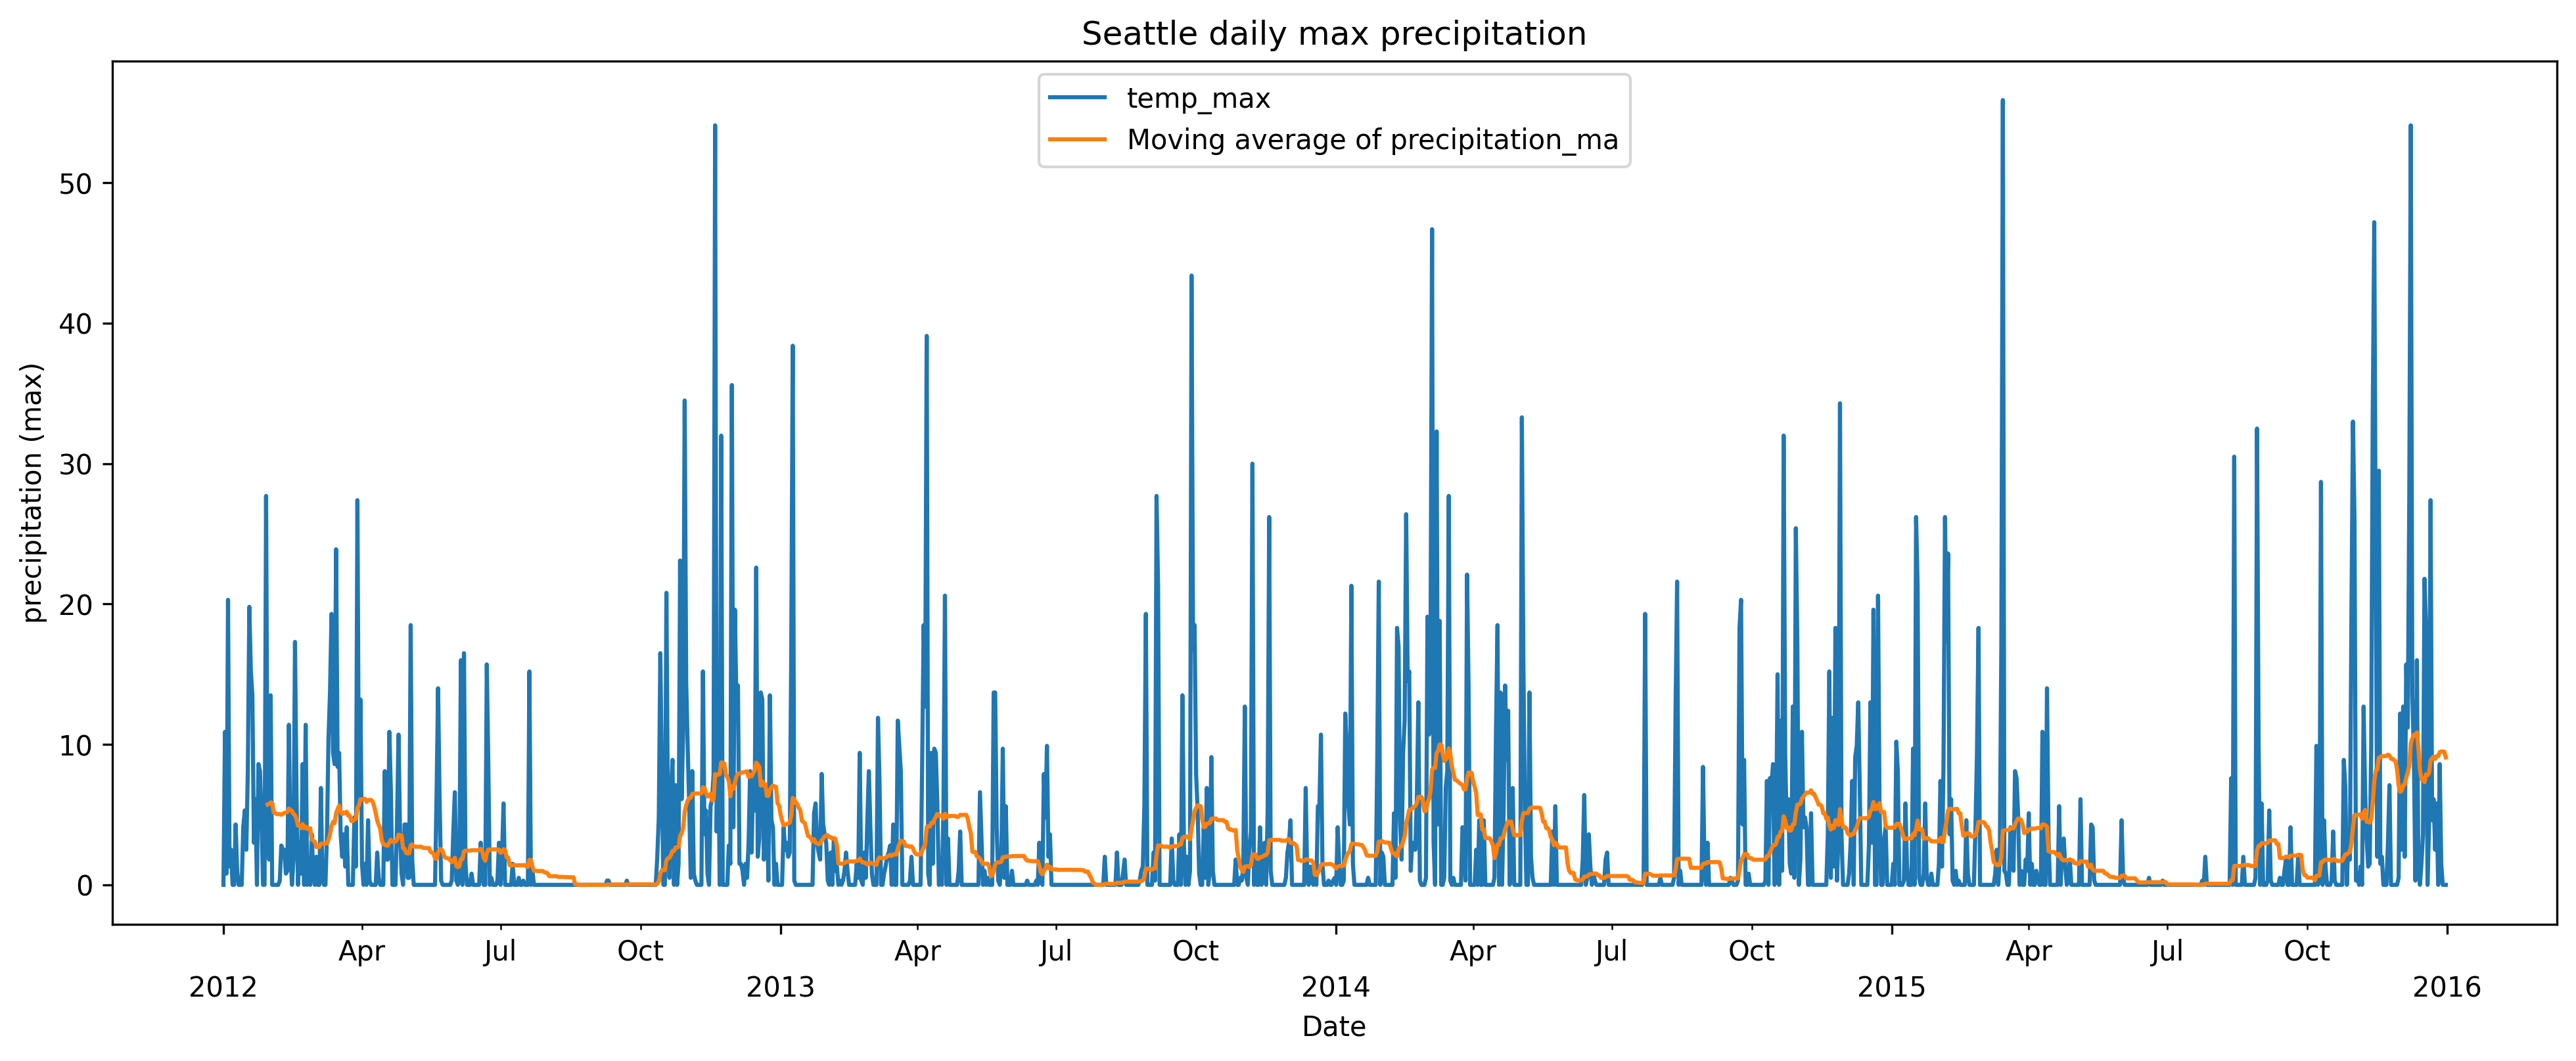

In [51]:
df['precipitation_ma'] = df['precipitation'].rolling(window=30).mean()

# Plotting
fig, ax = plt.subplots(figsize=(16, 6), dpi=300)
ax.plot(df['precipitation'], label = "temp_max")
ax.plot(df['precipitation_ma'], label = "Moving average of precipitation_ma")

# Formatting axe to make it easier to read
ax.xaxis.set_major_locator(dt.YearLocator())
ax.xaxis.set_minor_locator(dt.MonthLocator((4,7,10)))

ax.xaxis.set_major_formatter(dt.DateFormatter("\n%Y"))
ax.xaxis.set_minor_formatter(dt.DateFormatter("%b"))
plt.setp(ax.get_xticklabels(), rotation=0, ha="center")
plt.subplots_adjust(bottom=0.15)

# Labelling 
plt.xlabel("Date")
plt.ylabel("precipitation (max)")
plt.title("Seattle daily max precipitation")
plt.legend()
plt.show()
output_path = os.path.join(folder,"precipitation.png")
fig.savefig(output_path)
plt.close(fig)
